In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
import numpy as np

# with non_normal data

In [67]:
df = pd.DataFrame(pd.read_parquet('../data/dataset_non_normalized.parquet'))

In [68]:
X = df.drop('Loan_Status_Y', axis = 1)
y = df['Loan_Status_Y']

In [69]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [70]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 15/35, random_state = 0)

In [8]:
mlp = MLPClassifier(
    hidden_layer_sizes = (100, 50)
)

In [9]:
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [10]:
mlp.score(X_val, y_val)

0.6885245901639344

### learning curve

In [17]:
train_sizes, train_scores, test_scores = learning_curve(
    mlp, X, y,
    scoring = 'accuracy',
    train_sizes = np.linspace(0.1, 1, 20),
    random_state = 41,
    cv = 5
)

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

In [18]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
train_scores_arr = np.mean(train_scores, axis=1)[1:]
test_scores_arr = np.mean(test_scores, axis=1)[1:]
train_sizes = train_sizes[1:]

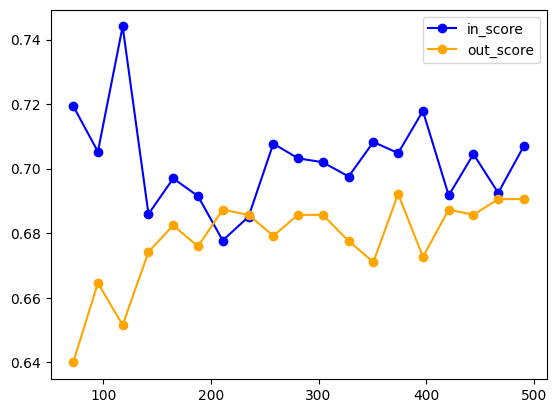

In [19]:
plt.plot(train_sizes, train_scores_arr, 'o-', color = 'blue', label='in_score')
plt.plot(train_sizes, test_scores_arr, 'o-', color = 'orange', label='out_score')
plt.legend()
plt.show()

the data is enough. so i use larger cv in fine tuning ...

### fine tuning activation function

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

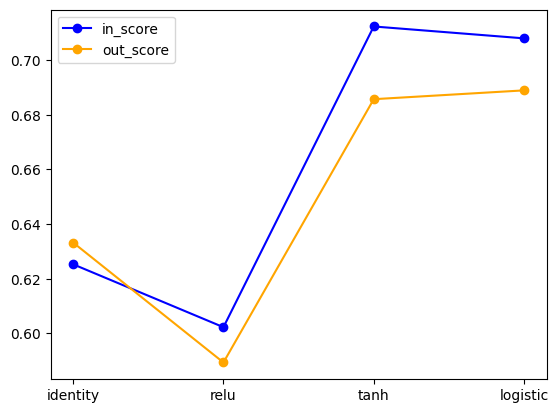

In [23]:
activation_list = ['identity', 'relu', 'tanh', 'logistic']
in_scores = []
out_scores = []

for activation in activation_list :
    mlp = MLPClassifier(
    hidden_layer_sizes = (100, 50),
    activation = activation
)
    scores = cross_validate(mlp, X, y, cv = 10, return_train_score = True)
    in_scores.append(scores['train_score'].mean())
    out_scores.append(scores['test_score'].mean())

plt.plot(activation_list, in_scores, 'o-', color = 'blue', label='in_score')
plt.plot(activation_list, out_scores, 'o-', color = 'orange', label='out_score')
plt.legend()
plt.show()

logistic

### fine tuning solver

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_resu

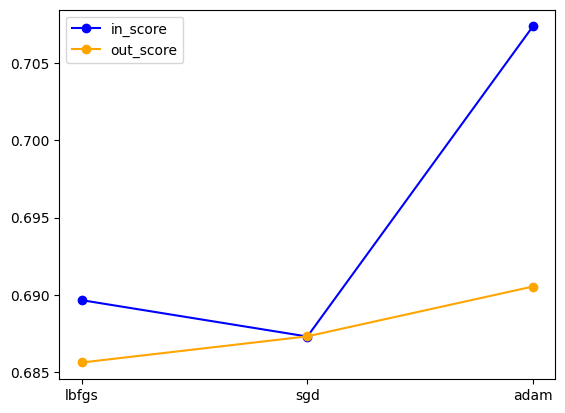

In [24]:
solver_list = ['lbfgs', 'sgd', 'adam']
in_scores = []
out_scores = []

for solver in solver_list :
    mlp = MLPClassifier(
    hidden_layer_sizes = (100, 50),
    activation = 'logistic',
    solver = solver
)
    scores = cross_validate(mlp, X, y, cv = 10, return_train_score = True)
    in_scores.append(scores['train_score'].mean())
    out_scores.append(scores['test_score'].mean())

plt.plot(solver_list, in_scores, 'o-', color = 'blue', label='in_score')
plt.plot(solver_list, out_scores, 'o-', color = 'orange', label='out_score')
plt.legend()
plt.show()

adam

### fine tuning alpha

0 < alpha < 1 :

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

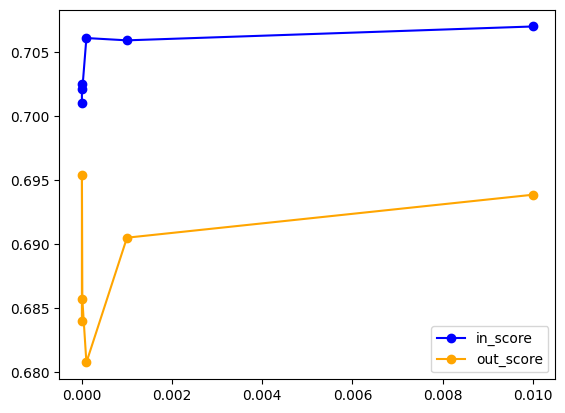

In [31]:
alpha_list = [10**i for i in range(-7, -1)]
in_scores = []
out_scores = []

for alpha in alpha_list :
    mlp = MLPClassifier(
    hidden_layer_sizes = (100, 50),
    activation = 'logistic',
    solver = 'adam',
    alpha = alpha
)
    scores = cross_validate(mlp, X, y, cv = 10, return_train_score = True)
    in_scores.append(scores['train_score'].mean())
    out_scores.append(scores['test_score'].mean())

plt.plot(alpha_list, in_scores, 'o-', color = 'blue', label='in_score')
plt.plot(alpha_list, out_scores, 'o-', color = 'orange', label='out_score')
plt.legend()
plt.show()

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


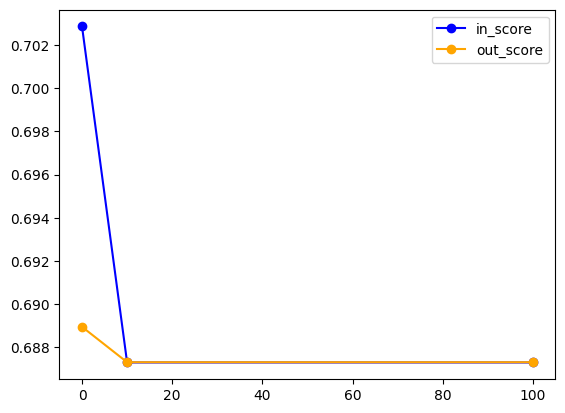

In [34]:
alpha_list = [0, 10, 100]
in_scores = []
out_scores = []

for alpha in alpha_list :
    mlp = MLPClassifier(
    hidden_layer_sizes = (100, 50),
    activation = 'logistic',
    solver = 'adam',
    alpha = alpha
)
    scores = cross_validate(mlp, X, y, cv = 10, return_train_score = True)
    in_scores.append(scores['train_score'].mean())
    out_scores.append(scores['test_score'].mean())

plt.plot(alpha_list, in_scores, 'o-', color = 'blue', label='in_score')
plt.plot(alpha_list, out_scores, 'o-', color = 'orange', label='out_score')
plt.legend()
plt.show()

analysing these curves i dont use regularization and set alpha = 0. because it is not overfitting and i dont use regularization

In [35]:
mlp = MLPClassifier(
    hidden_layer_sizes = (100, 50),
    activation = 'logistic',
    solver = 'adam',
    alpha = 0
)

In [ ]:
mlp.fit(X_train, y_train)

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100, ...)"
,activation,'logistic'
,solver,'adam'
,alpha,0
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [38]:
mlp.score(X_test, y_test)

0.7204301075268817

In [73]:
mlp = MLPClassifier(
    hidden_layer_sizes = (64, 32, 120),
    activation = 'logistic',
    solver = 'adam',
    alpha = 0
)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.7311827956989247

# with normal data

In [52]:
df = pd.DataFrame(pd.read_parquet('../data/dataset_normalized.parquet'))

In [53]:
X = df.drop('Loan_Status_Y', axis = 1)
y = df['Loan_Status_Y']

In [54]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.35, random_state = 1)

In [55]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 15/35, random_state = 0)

In [60]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='logistic',
    solver='adam',
    alpha=0
)

In [61]:
mlp.fit(X_train, y_train)

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100, ...)"
,activation,'logistic'
,solver,'adam'
,alpha,0
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [66]:
mlp.score(X_val, y_val)

1.0

In [65]:
scores = cross_validate(mlp, X, y, cv = 10)
print(scores['test_score'].mean())

C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

1.0


C:\Users\Pacific\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


incredibely the score for normalized data is 1 and i dont know is it right or not

# 73 % with non_normal data

# 100 % (!) with normal data